In [1]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv("../data/df_samp.csv")

In [3]:
sample = test[['meter_reading','square_feet','air_temperature','primary_use','meter']].head(100000)

In [4]:
sample.shape

(100000, 5)

In [5]:
sample.head()

,meter_reading,square_feet,air_temperature,primary_use,meter
0,886.418,76257,12.8,Education,chilledwater
1,1266.310,200933,12.8,Lodging/residential,chilledwater
2,1477.360,76257,12.2,Education,chilledwater
3,2152.730,200933,12.2,Lodging/residential,chilledwater
4,1603.990,76257,12.8,Education,chilledwater


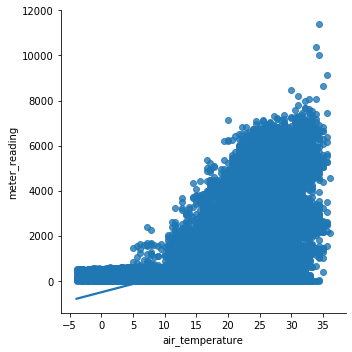

In [6]:
sns.lmplot(x='air_temperature',y='meter_reading',data=sample)

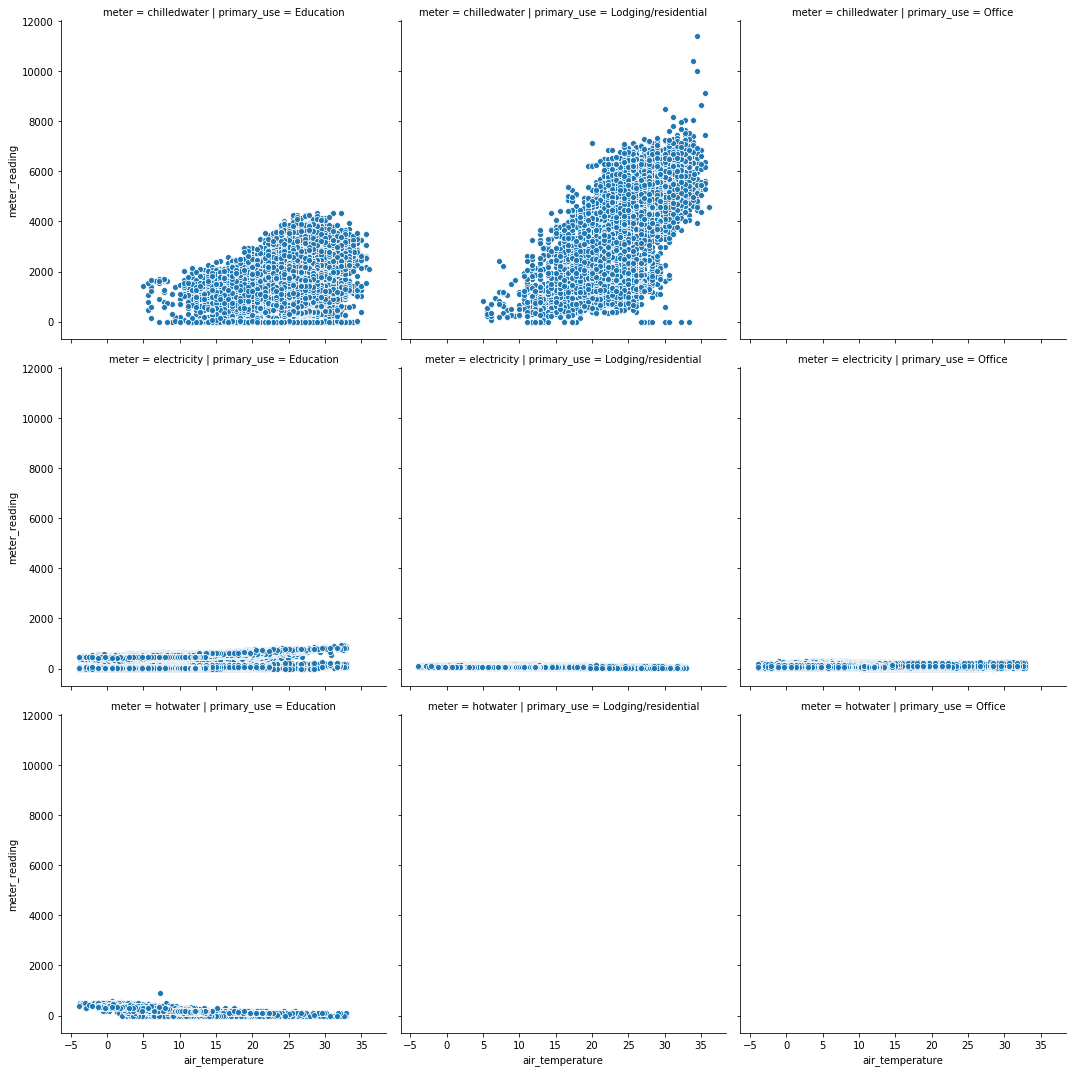

In [7]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="primary_use",
                 row='meter',
                 kind="scatter", data=sample)

In [8]:
def HDD(x):
    dd = 18-x
    if dd>0:
        return dd
    else:
        return 0

In [9]:
sample['HDD']=sample['air_temperature'].apply(lambda x: HDD(x))
sample[sample.HDD==0]

,meter_reading,square_feet,air_temperature,primary_use,meter,HDD
12,1857.26,76257,21.1,Education,chilledwater,0.0
13,2828.09,200933,21.1,Lodging/residential,chilledwater,0.0
14,1941.68,76257,22.2,Education,chilledwater,0.0
15,2828.09,200933,22.2,Lodging/residential,chilledwater,0.0
16,1772.84,76257,23.9,Education,chilledwater,0.0
...,...,...,...,...,...,...
86038,119.30,102957,18.0,Lodging/residential,electricity,0.0
86039,62.00,49589,18.0,Lodging/residential,electricity,0.0
86040,55.00,50020,18.0,Office,electricity,0.0
86041,222.00,82548,18.0,Office,electricity,0.0


In [10]:
sample['energy_perfeet'] = sample['meter_reading']/sample['square_feet']
sample

,meter_reading,square_feet,air_temperature,primary_use,meter,HDD,energy_perfeet
0,886.418,76257,12.8,Education,chilledwater,5.2,0.011624
1,1266.310,200933,12.8,Lodging/residential,chilledwater,5.2,0.006302
2,1477.360,76257,12.2,Education,chilledwater,5.8,0.019373
3,2152.730,200933,12.2,Lodging/residential,chilledwater,5.8,0.010714
4,1603.990,76257,12.8,Education,chilledwater,5.2,0.021034
...,...,...,...,...,...,...,...
99995,442.600,91149,-1.2,Education,electricity,19.2,0.004856
99996,354.638,91149,-1.2,Education,hotwater,19.2,0.003891
99997,20.200,38319,-1.2,Education,electricity,19.2,0.000527
99998,68.000,102957,-1.2,Lodging/residential,electricity,19.2,0.000660


In [11]:
HDD(4)

14

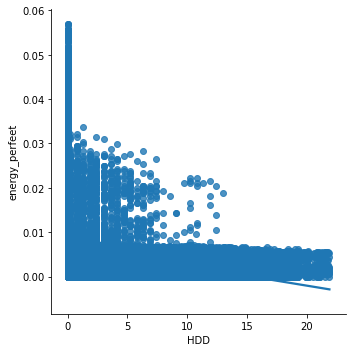

In [12]:
sns.lmplot(x='HDD',y='energy_perfeet',data=sample)

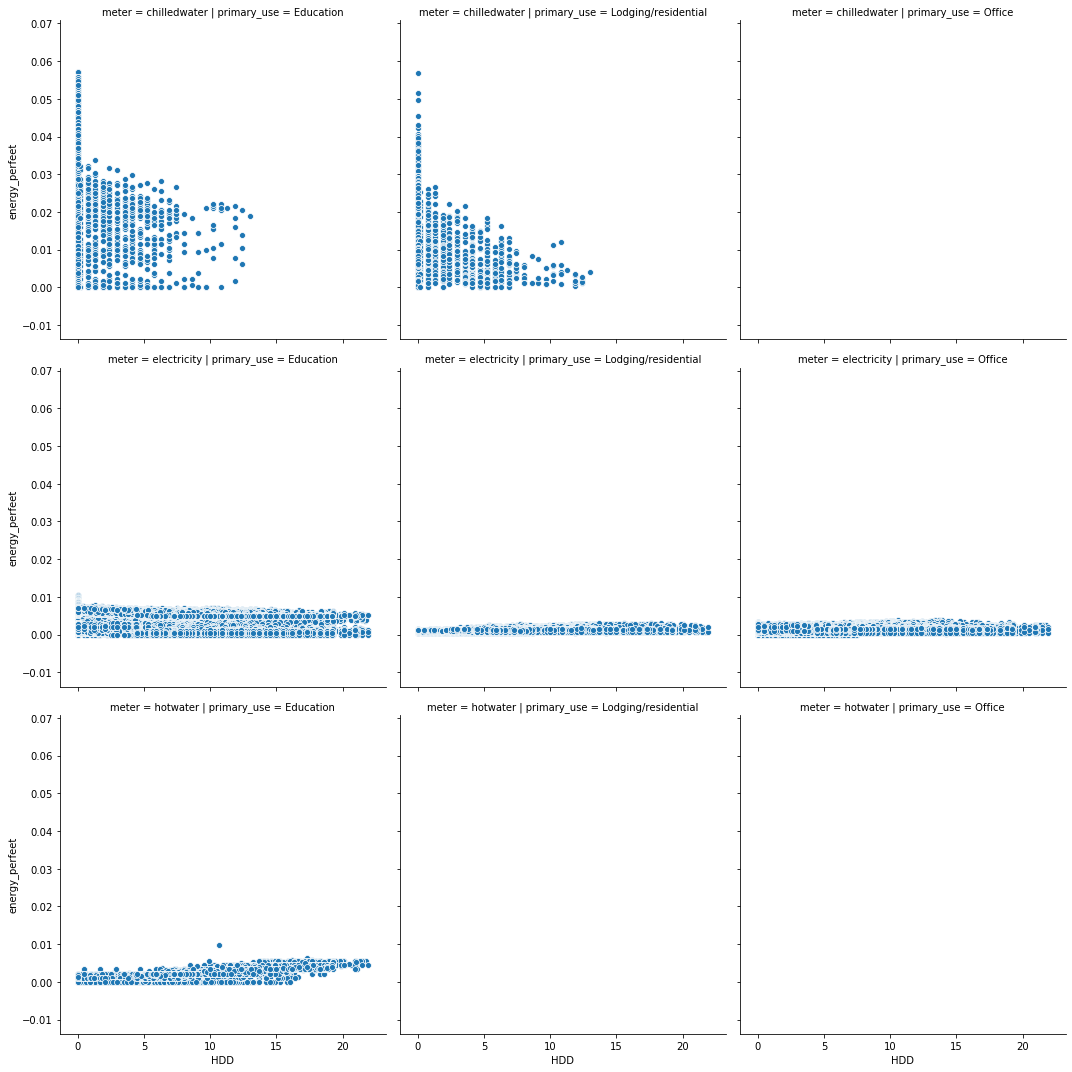

In [13]:
k = sns.relplot(x="HDD", y="energy_perfeet",
                 col="primary_use",
                 row='meter',
                 kind="scatter", data=sample)